In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [2]:
df=pd.read_csv(r"C:\Users\pc\Downloads\mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.shape

(8124, 23)

<Axes: xlabel='class', ylabel='Count'>

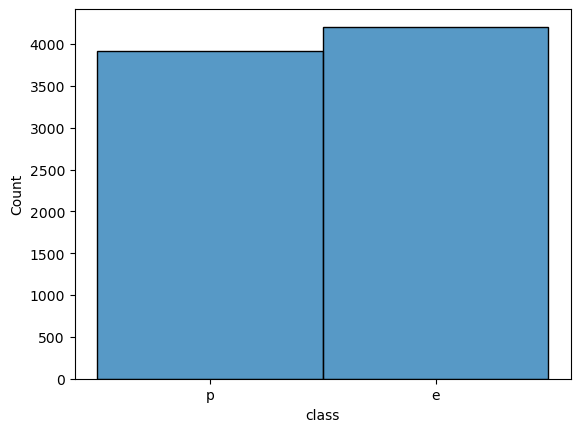

In [8]:
sns.histplot(df['class'])

In [9]:
x=df.drop('class',axis=1)
y=df['class']

In [10]:
x=pd.get_dummies(x)
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [11]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
print(y)
#to transform categorical labels into numerical values
#the LabelEncoder assigns a unique integer to each unique category in the original labels

[1 0 0 ... 0 1 0]


In [12]:
y_df=pd.DataFrame(y)
print(y_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       8124 non-null   int32
dtypes: int32(1)
memory usage: 31.9 KB
None


#### splitting into trainig and testing:


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#### Creating decisions tree using entropy:

In [32]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf.fit(x_train,y_train)
#entropy is the uncertainity in a dataset.it aims to minimise the entropy of the target variable

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388.0, 3111.0]'),
 Text(0.3333333333333333, 0.625, 'x[20] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.2222222222222222, 0.375, 'x[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.7777777777777778, 0.625, 'x[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.6666666666666666, 0.375, 'x[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.012\nsamples = 2740\nvalue = [2737.0, 3.0]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.902\nsamples = 44\nvalue = [14.0, 30.0]'),
 Text(0.8888888888888888, 0.375, 'entr

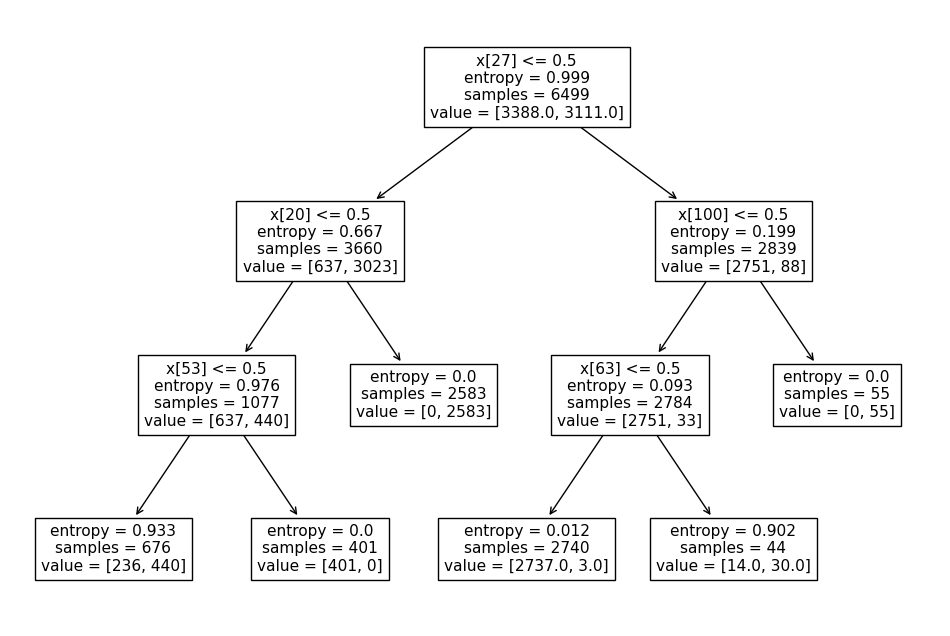

In [33]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train,y_train))

In [34]:
#predict values
y_pred=clf.predict(x_test)


In [35]:
#predict values using x_train
y_pred_train=clf.predict(x_train)

#### calculating accuracy_score from scikit_learn

In [36]:
print('criterion entropy accuracy:{0:.2f}'.format(accuracy_score(y_test,y_pred)*100))
print('Training set:{0:.2f}'.format(accuracy_score(y_train,y_pred_train)*100))

criterion entropy accuracy:96.37
Training set:96.11


#### calculating accuracy_score from classifier

In [37]:
print('Training set score: {0:.2f}'.format(clf.score(x_train,y_train)*100))
print('Test set score:{0:.2f}'.format(clf.score(x_test,y_test)*100))

Training set score: 96.11
Test set score:96.37


In [38]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[766  54]
 [  5 800]]


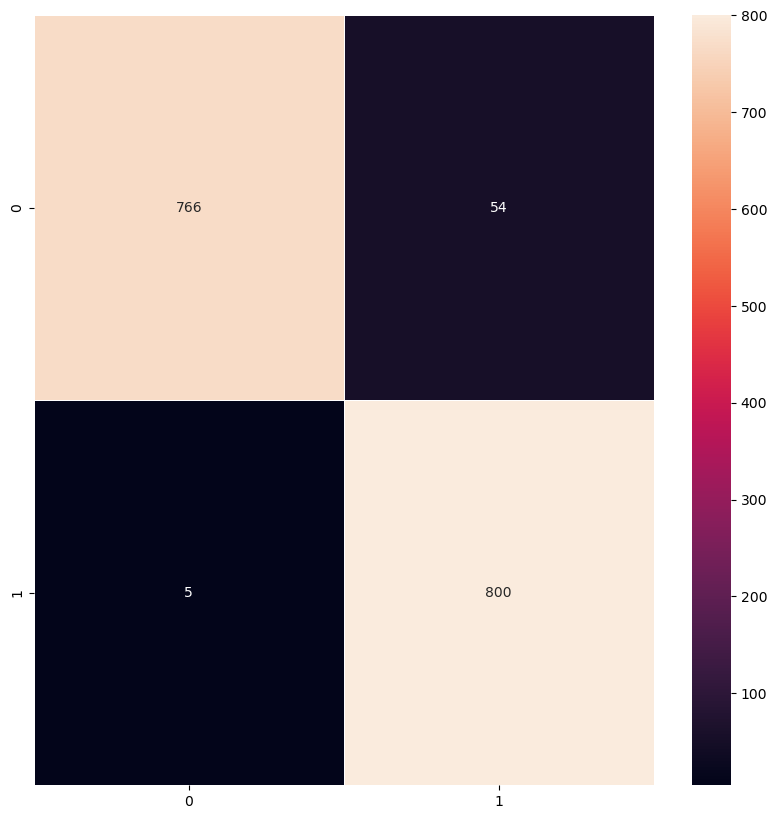

In [39]:
plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidth=0.5,fmt='d')
plt.show()

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       820
           1       0.94      0.99      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



In [41]:
f1_score=f1_score(y_test,y_pred)
print(f1_score)

0.9644364074743822
